<a href="https://colab.research.google.com/github/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/copiaengithub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from datetime import datetime
import seaborn as sns
import matplotlib.dates

In [303]:
data=pd.read_csv("https://github.com/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/AEP_hourly.csv?raw=true")
data.iloc[::-1]
data.shape


(121273, 2)

In [304]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [305]:
data[data["AEP_MW"] == data["AEP_MW"].max()]

,Datetime,AEP_MW
30221,2008-10-20 14:00:00,25695.0


In [306]:
data[data["AEP_MW"] == data["AEP_MW"].min()]

,Datetime,AEP_MW
100759,2016-10-02 05:00:00,9581.0


In [307]:
data["New_Date"] = pd.to_datetime(data["Datetime"]).dt.date
data["New_Time"] = pd.to_datetime(data["Datetime"]).dt.time
data["Time"]=data["New_Time"].astype("string")
times=data["Time"].str.split(":",1, expand = True)
data["Time"]=times[0]
data["Time"]=data["Time"].to_numpy()
data["Year"] = pd.DatetimeIndex(data['New_Date']).year
data["Month"] = pd.DatetimeIndex(data['New_Date']).month
data.head()

,Datetime,AEP_MW,New_Date,New_Time,Time,Year,Month
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,01,2004,12
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,02,2004,12
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,03,2004,12
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,04,2004,12
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,05,2004,12


In [308]:
year=data.groupby(["Year"]).mean()
year.head()


,AEP_MW,Month
Year,,
2004,15176.724388,11.000907
2005,15842.990865,6.525919
2006,15737.224252,6.525919
2007,16645.519297,6.525919
2008,16536.655659,6.513550


In [309]:
year["Year"]=year.index
year.head()

,AEP_MW,Month,Year
Year,,,
2004,15176.724388,11.000907,2004
2005,15842.990865,6.525919,2005
2006,15737.224252,6.525919,2006
2007,16645.519297,6.525919,2007
2008,16536.655659,6.513550,2008


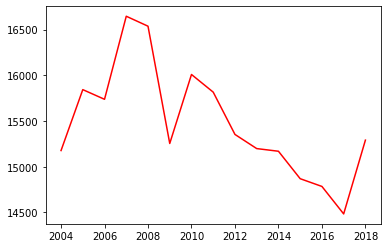

In [310]:
plt.plot(year["Year"],year["AEP_MW"], color="red")

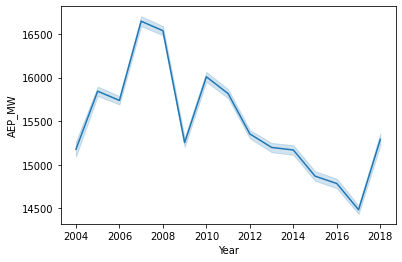

In [311]:
sns.lineplot(x=data["Year"],y=data["AEP_MW"], data=data)

In [312]:
months=data.groupby(["Month"]).mean()
months.head()

,AEP_MW,Year
Month,,
1,17431.269009,2011.500000
2,17022.815084,2011.503797
3,15376.835720,2011.498606
4,13823.857511,2011.501191
5,14006.393817,2011.500000


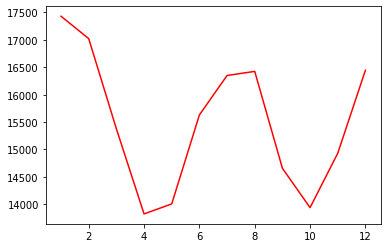

In [313]:
plt.plot(months["AEP_MW"], color="red")

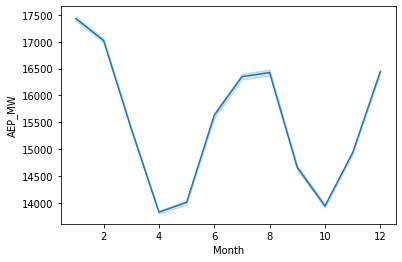

In [314]:
sns.lineplot(x=data["Month"],y=data["AEP_MW"])

In [315]:
hs=data.groupby(["Time"]).mean()

hs.head()



,AEP_MW,Year,Month
Time,,,
00,14651.191569,2011.172571,6.498714
01,13891.478433,2011.169569,6.500198
02,13432.062995,2011.178288,6.495444
03,13184.049008,2011.168651,6.509524
04,13095.193350,2011.169404,6.499109


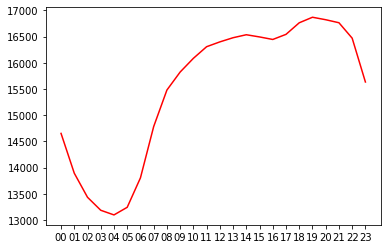

In [316]:

plt.plot(hs["AEP_MW"], color="red")

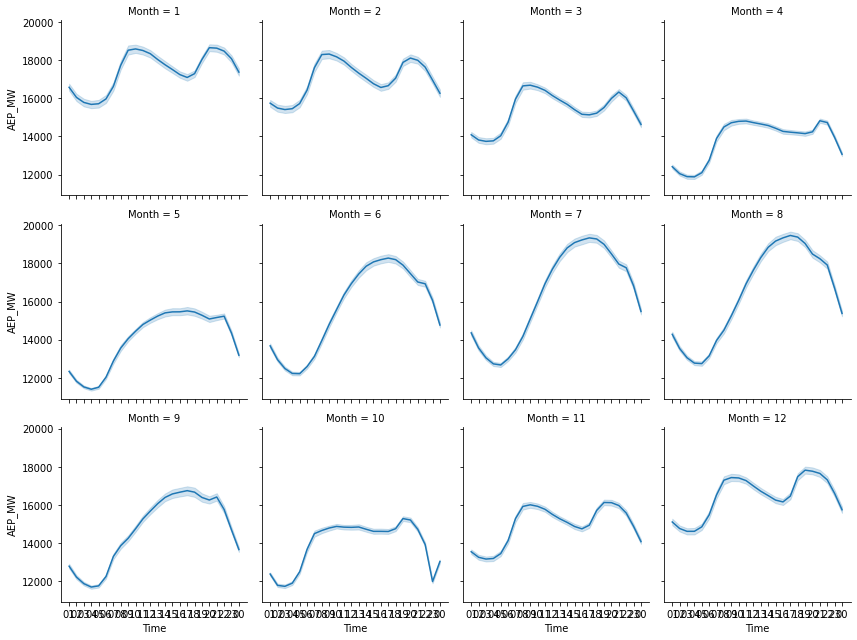

In [332]:
sns.relplot(x=data["Time"],y=data["AEP_MW"], col=data["Month"],kind="line",col_wrap=4, height=3)

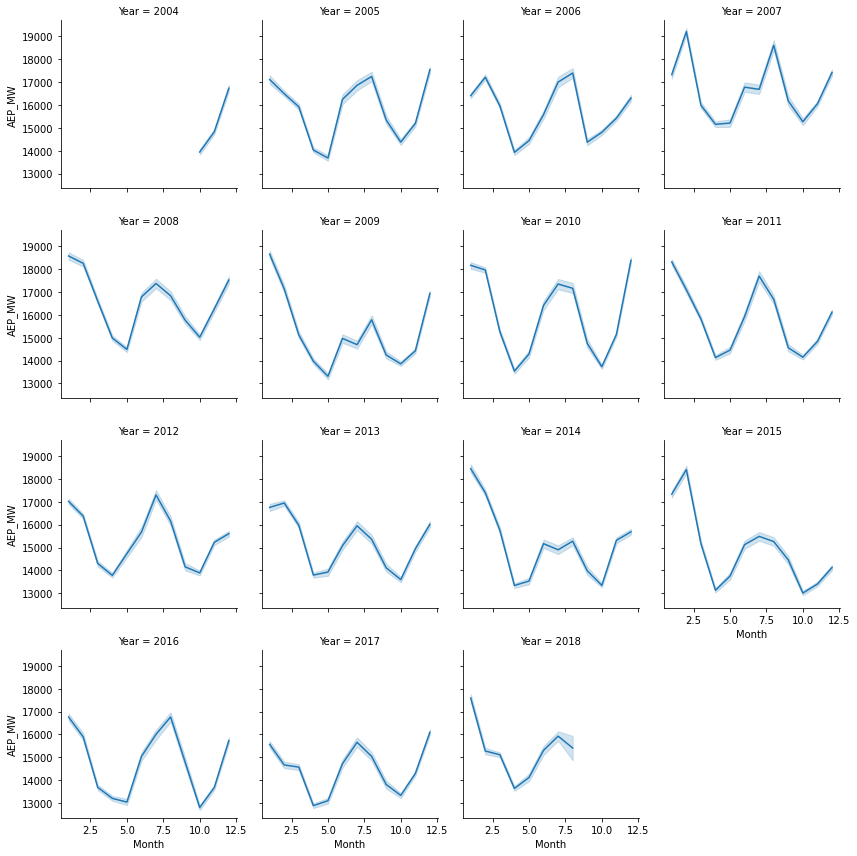

In [334]:
sns.relplot(x=data["Month"],y=data["AEP_MW"], col=data["Year"],kind="line",col_wrap=4, height=3)

month: 1
month: 2
month: 3
month: 4
month: 5
month: 6
month: 7
month: 8
month: 9
month: 10
month: 11
month: 12


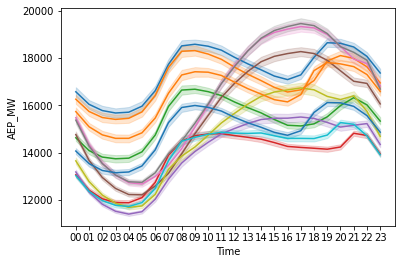

In [319]:
for i in range(1,13):
  print("month: "+str(i))
  data2=data[data["Month"]==i]
  sns.lineplot(x=data2["Time"],y=data2["AEP_MW"])

TypeError: ignored

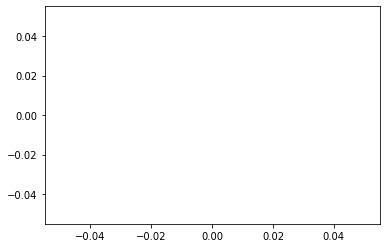

In [320]:
sns.lineplot(x=data["New_Time"],y=data["AEP_MW"], data=data)

In [ ]:
data["Year"].unique()

In [ ]:
##Regression 


In [ ]:
x=year["Year"]
y=year["AEP_MW"]
x=x[:,np.newaxis]
lm=LinearRegression()
lm.fit(x,y)

In [ ]:
lm.score(x,y)

In [ ]:
plt.plot(x,y, color="red")
plt.plot(x,lm.predict(x), color="blue")

In [ ]:
for d in range(1,7):
    poly =PolynomialFeatures(degree=d)
    xpoly=poly.fit_transform(x)
    lm=linear_model.LinearRegression()
    lm.fit(xpoly,y)
    print("Regresion de grado: "+str(d)+", - "+str(lm.score(xpoly,y)))
    #regresion_validation(xpoly,y,lm.predict(xpoly))
    plt.xlabel("Year")
    plt.ylabel("MW")
    plt.title("Year vs mean MW")
    plt.plot(x,y, color='red')
    plt.plot(x,lm.predict(poly.fit_transform(x)))

In [ ]:
data[data["Year"] == 2013].nunique()

In [ ]:
plt.plot(data["Month"],data["AEP_MW"], color="red")

In [ ]:
x=data["Year"]
y=data["AEP_MW"]
x=x[:,np.newaxis]

In [ ]:
lm=LinearRegression()
lm.fit(x,y)

In [ ]:
lm.score(x,y)

In [ ]:
plt.plot(x,y,"ro", color="red")
plt.plot(x,lm.predict(x), color="blue")

In [ ]:
sns.lineplot(x=x,y=y)

In [ ]:
poly =PolynomialFeatures(degree=15)
poly